In [1]:
import os
from random import choice
import re
import json

import jieba.analyse
import jieba.posseg
import gensim
import lda

from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from collections import Counter

In [2]:
with open("lyrics_rock.json",'r') as load_f:
    load_dict = json.load(load_f)

In [3]:
corpus = []

for key in load_dict:
    corpus.append(load_dict[key].strip())

In [4]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

word = vectorizer.get_feature_names()
weight = tfidf.toarray()

In [5]:
clf = KMeans(n_clusters=7)
s = clf.fit(weight)

In [6]:
sub_style = {}
num = 0

for x in clf.labels_:
    if x not in sub_style:
        sub_style[x]=corpus[num]
    else:
        sub_style[x]+=(' '+corpus[num])
        
    num+=1

In [7]:
def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(["rgb(94,38,18)", "rgb(41,36,33)", "rgb(128,128,105)", "rgb(112,128,105)"])

def draw_cloud(word_freq):  
    wc = WordCloud(
        font_path='MFSongHe_Noncommercial-Regular.ttf',
        background_color="white",  
                   max_words=30,    
                   max_font_size=80, 
                   random_state=42,
                   )

    wc.generate_from_frequencies(word_freq)

    plt.figure()

    plt.imshow(wc.recolor(color_func=my_color_func), interpolation='bilinear')

    plt.axis("off")
    plt.show()

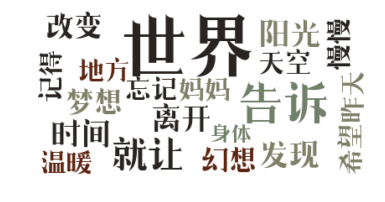

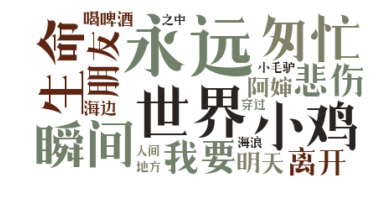

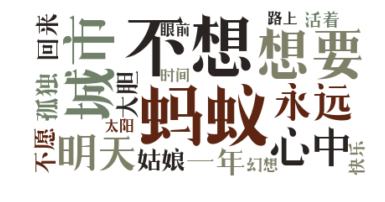

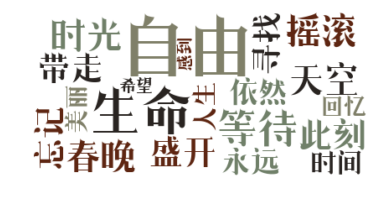

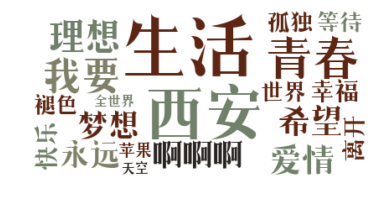

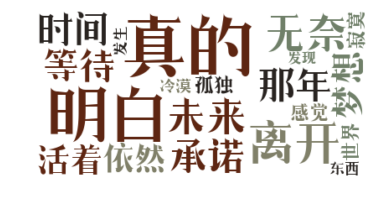

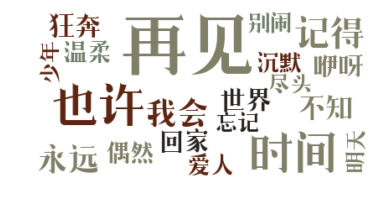

In [8]:
for x in sub_style:
    tag_str = sub_style[x]
    vectorizer = CountVectorizer()
    cif = vectorizer.fit_transform([tag_str])
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(cif)
    word = vectorizer.get_feature_names()
    word = np.array(word)  
    weight = tfidf.toarray()
    word_index = np.argsort(-weight)
    word = word[word_index]
    
    weight = weight[0][word_index]
    keywords = []
    for i in range(20):
        keywords.append([word[0][i],weight[0][i]])
        
    dic = {}
    
    for item in keywords:
        dic[item[0]] = item[1]
            
    draw_cloud(dic)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.793 seconds.
Prefix dict has been built succesfully.


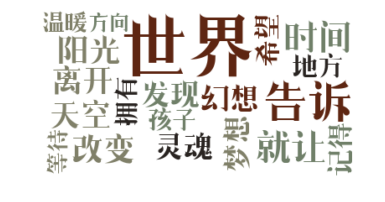

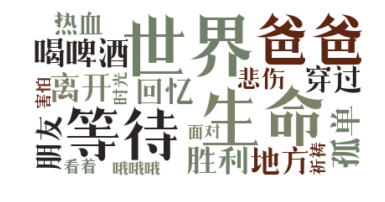

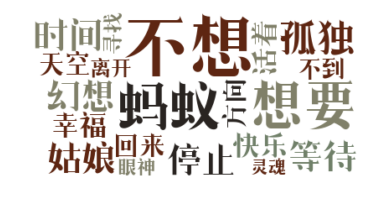

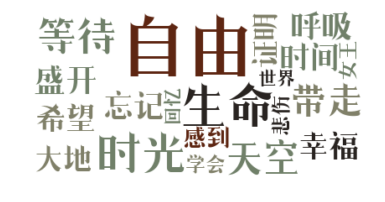

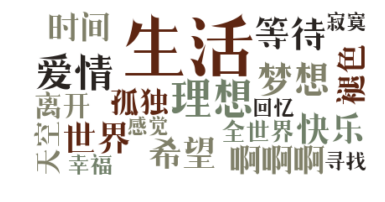

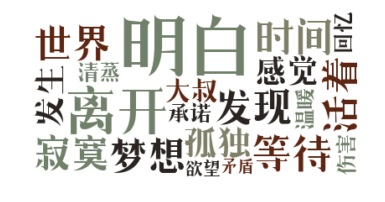

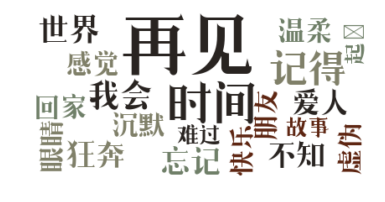

In [9]:
for x in sub_style:
    keywords = jieba.analyse.textrank(sub_style[x], topK=20, withWeight=True, allowPOS=("a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"))
    dic = {}
    
    for item in keywords:
        dic[item[0]] = item[1]
            
    draw_cloud(dic)